In [1]:
#defining imports
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import glob

In [2]:
module_path = os.path.abspath(os.path.join('.'))

In [3]:
#The path where the csv file contating the cleaned up and combined csv file for all subject for the case of Basketball column
path = module_path + ('/csv_')
path

'G:\\Final/csv_'

In [4]:
DataFrame = pd.read_csv(path + '/basketball/basketball_.csv')

In [5]:
#Defining dataframe to get the label counts
DataFrame.basketball.unique()
labels = DataFrame.basketball.value_counts()
DataFrame.head(7)

subject    acc_x    acc_y    acc_z  coarse basketball   locomotion  \
0        0 -0.59229  2.76611 -0.82324  warmup  dribbling  not_labeled   
1        0  1.46948  0.83838 -1.05298  warmup  dribbling  not_labeled   
2        0  1.49487  0.66113  0.29883  warmup  dribbling  not_labeled   
3        0  4.26636  2.53906 -2.51562  warmup  dribbling  not_labeled   
4        0  2.47534 -0.52466  0.61523  warmup  dribbling  not_labeled   
5        0 -1.18970 -3.71948  3.38745  warmup  dribbling  not_labeled   
6        0 -1.90381  0.18701  0.72876  warmup  dribbling  not_labeled   

       off/def       in/out  
0  not_labeled  not_labeled  
1  not_labeled  not_labeled  
2  not_labeled  not_labeled  
3  not_labeled  not_labeled  
4  not_labeled  not_labeled  
5  not_labeled  not_labeled  
6  not_labeled  not_labeled

In [6]:
#subject mapping
#['05d8': 0, '10f0': 1, '2dd9': 2, '4991': 3,'4d70': 4, 
#'b512': 5, '9bd4': 6, 'e90f': 7, 'ce9d': 8,  846: 9, 
#'a0da': 10, 'ac59': 11, 'f2ad': 12]

In [7]:
#x is the label names, y is counts of label
x = labels.index.to_list()
y = labels.to_list()
print(x, y)
hist_b = {'basketball': y}

['dribbling', 'shot', 'pass', 'layup', 'rebound'] [478105, 83289, 56825, 35638, 15347]


           basketball
dribbling      478105
shot            83289
pass            56825
layup           35638
rebound         15347


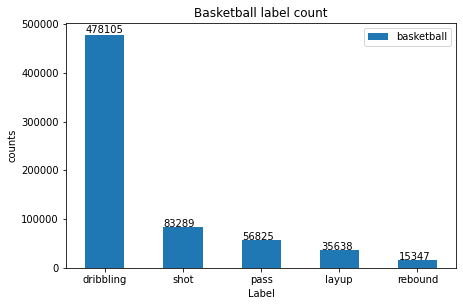

In [8]:
#Creathing dataframe for the purpose of plotting the bar plot for label counts
d_f = pd.DataFrame( hist_b, columns = ['basketball'] ,index= x)
print(d_f)
ax = d_f.plot(kind='bar', title = 'Basketball label count', rot=0, width = 0.5, figsize=(7, 4.5))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('counts')
plt.xlabel('Label')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))
plt.savefig('Basketball label counts.png',bbox_inches='tight', dpi=300)
plt.show()

In [9]:
#To plot the sensor data for 500 points
import plotly.graph_objects as go
import numpy as np

sensor_names = ['acc_y']
sampling_rate = 50

def plot_activity(data, label, sensor_names, sampling_rate):
   
    filtered_data = data[data.locomotion==label]
    filtered_data =  filtered_data[0:500]
    
    y_axis = filtered_data[sensor_names]
    #print(np.array(range(len(filtered_data))))
    x_axis = np.array(range(len(filtered_data))) / sampling_rate

    fig = go.Figure()
    for s in sensor_names: 
      fig.add_trace(go.Scatter(x=x_axis, y=y_axis[s], name=s))
    fig.update_layout(margin_l=0,margin_r=0)  
    fig.update_layout(title="activity: "+label)
    fig.update_layout(xaxis_title="time (seconds)")
    fig.update_layout(yaxis_title="acceleration (10g)")
    fig.update_layout(legend_x=0, legend_bgcolor='rgba(0,0,0,0.2)')
    fig.show()

plot_activity(DataFrame, 'running', sensor_names, 50)

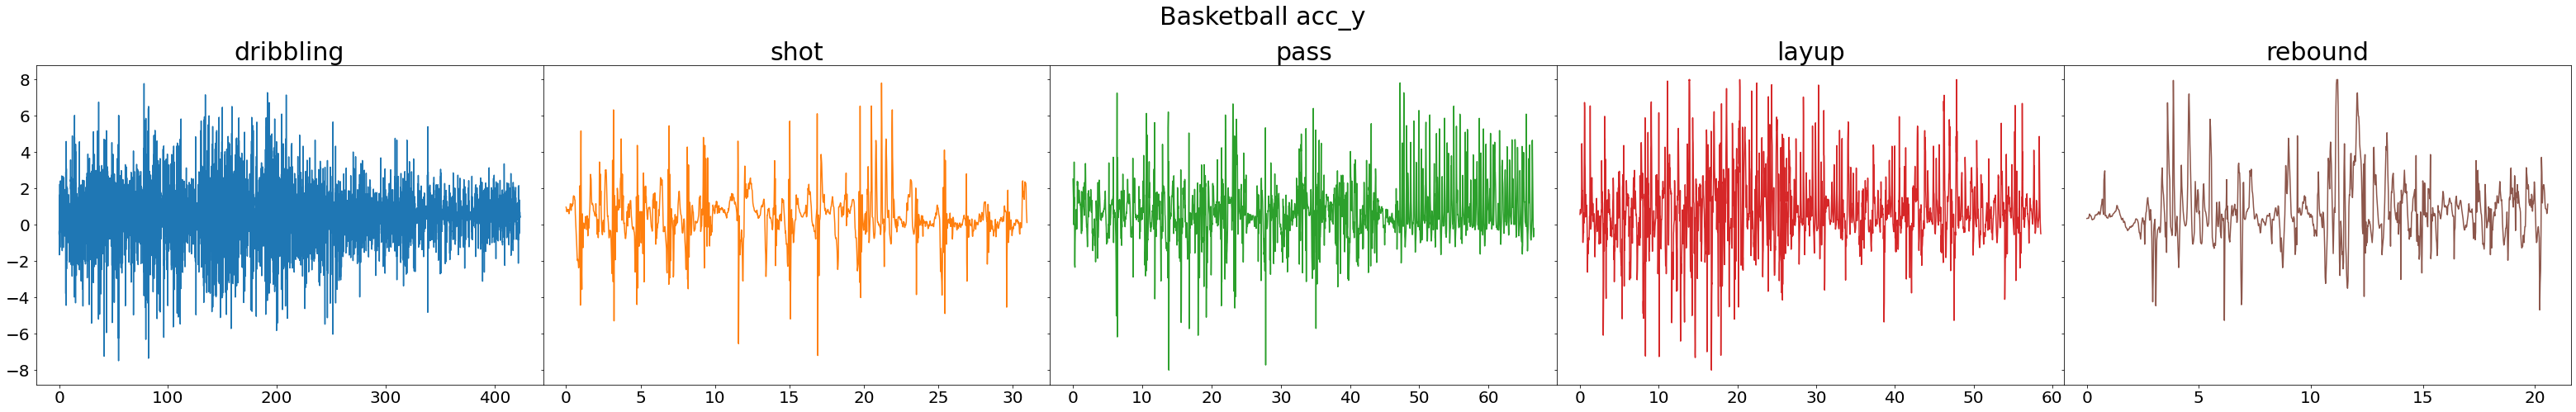

In [10]:
#To visualise the y component accleration for different basketball activity
#for visualization only 30000 datapoints are considered

BB = DataFrame[40000:70000]
#acc y
fig, axs = plt.subplots(1,5, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle('Basketball acc_y',fontsize=30, y=1.4)
plt.subplots_adjust(top=1.2)
fig.set_size_inches(55, 5, forward=True)
axs[0].plot(np.array(range(len(BB[BB.basketball=='dribbling']))) / sampling_rate, BB[BB.basketball=='dribbling']['acc_y'])
axs[1].plot(np.array(range(len(BB[BB.basketball=='shot']))) / sampling_rate, BB[BB.basketball=='shot']['acc_y'],'tab:orange')
axs[2].plot(np.array(range(len(BB[BB.basketball=='pass']))) / sampling_rate, BB[BB.basketball=='pass']['acc_y'],'tab:green')
axs[3].plot(np.array(range(len(BB[BB.basketball=='layup']))) / sampling_rate, BB[BB.basketball=='layup']['acc_y'],'tab:red')
axs[4].plot(np.array(range(len(BB[BB.basketball=='rebound']))) / sampling_rate, BB[BB.basketball=='rebound']['acc_y'],'tab:brown')

axs[0].yaxis.set_tick_params(labelsize=20)
axs[0].xaxis.set_tick_params(labelsize=20)
axs[1].xaxis.set_tick_params(labelsize=20)
axs[2].xaxis.set_tick_params(labelsize=20)
axs[3].xaxis.set_tick_params(labelsize=20)
axs[4].xaxis.set_tick_params(labelsize=20)

axs[0].set_title("dribbling",fontsize=30)
axs[1].set_title("shot",fontsize=30)
axs[2].set_title("pass",fontsize=30)
axs[3].set_title("layup",fontsize=30)
axs[4].set_title("rebound",fontsize=30)

for ax in axs:
    ax.label_outer()


for ax in axs:
    ax.label_outer()

plt.savefig('Input data basketball.png',bbox_inches='tight', dpi=300)

In [11]:
#To load the data from predefined data loder from preprocess_data_
#imports related to data preprocessing was taken from, https://github.com/mariusbock/dl-for-har
#with some modification according to our datasets

import numpy as np
import warnings
warnings.filterwarnings("ignore")

from data_processing.preprocess_data import load_dataset


# loading the dataset
X, y, num_classes, class_names, sampling_rate, has_null = load_dataset('basketball_', pred_type='basketball', include_null=False)

# concating features and labels
data = np.concatenate((X, y[:, None]), axis=1)
print(data)
#since our data has string values for 5th column, we delete this column and conver to float
data = np.delete(data, 4, 1).astype(np.float32)

print('#################')

print('\nShape of the dataset:')
print(data.shape)
print(data)

Processing dataset files ...
Full dataset with size: | X (669204, 5) | y (669204,) | 
 ..from file csv_/basketball\basketball_.csv
[['0' '-0.59229' '2.76611' '-0.82324' 'warmup' 2]
 ['0' '1.46948' '0.83838' '-1.05298' 'warmup' 2]
 ['0' '1.49487' '0.66113' '0.29883' 'warmup' 2]
 ...
 ['12' '-0.80518' '0.27905' '-0.1001' 'not_labeled' 3]
 ['12' '-0.82544' '0.26904' '-0.104' 'not_labeled' 3]
 ['12' '-0.84326' '0.24976' '-0.09692' 'not_labeled' 3]]
#################

Shape of the dataset:
(669204, 5)
[[ 0.      -0.59229  2.76611 -0.82324  2.     ]
 [ 0.       1.46948  0.83838 -1.05298  2.     ]
 [ 0.       1.49487  0.66113  0.29883  2.     ]
 ...
 [12.      -0.80518  0.27905 -0.1001   3.     ]
 [12.      -0.82544  0.26904 -0.104    3.     ]
 [12.      -0.84326  0.24976 -0.09692  3.     ]]


In [12]:
#Data Augmentation to include random noise
#checking number of unique label in the data
print(np.unique(data[:, 4]))
#Creating a array which includes only label 3, i.e Rebound
data_1 = data[data[:, 4] == 3]

#Creating a new array that has only acclerometer data x,y,z for label Rebound
data_12 = data_1[:, 1:4]

#Generating random number between 0 and 0.1 with same shape as data_12 
noise = np.random.normal(0, .1, data_12.shape)
print('noise:', noise)

#Adding noise to data for rebound
data_new = data_12 + noise
print(data_new)

#Concating the subject row and label row to the new augmented data
data_new = np.concatenate((data_1[:, 0][:, None], data_new, data_1[:, 4][:, None]), axis =1)
print(data_new)

#adding augmented data to the dataset
aug_data = []
aug_data.append(data)
aug_data.append(data_new)

#print(aug_data)
data_aug = np.concatenate(aug_data, axis = 0)

#Verifying the size of augmented data
print(data.shape)
print(data_new.shape)
print(data_aug.shape)

data = data_aug

[0. 1. 2. 3. 4.]
noise: [[ 0.07660135 -0.13083604  0.07986494]
 [-0.14042291  0.13664911 -0.02053876]
 [-0.02904758  0.00765137 -0.05921413]
 ...
 [ 0.08123852  0.14168667 -0.1700396 ]
 [-0.02128004 -0.12589981  0.05485354]
 [-0.02644911  0.01741492  0.01442579]]
[[ 2.81317123  0.12697395  0.53884493]
 [ 2.52388707  0.15471911 -0.23635876]
 [ 2.41040245  0.67513136  0.14513586]
 ...
 [-0.72394149  0.42073666 -0.2701396 ]
 [-0.84672003  0.14314018 -0.04914647]
 [-0.8697091   0.26717492 -0.08249421]]
[[ 0.          2.81317123  0.12697395  0.53884493  3.        ]
 [ 0.          2.52388707  0.15471911 -0.23635876  3.        ]
 [ 0.          2.41040245  0.67513136  0.14513586  3.        ]
 ...
 [12.         -0.72394149  0.42073666 -0.2701396   3.        ]
 [12.         -0.84672003  0.14314018 -0.04914647  3.        ]
 [12.         -0.8697091   0.26717492 -0.08249421  3.        ]]
(669204, 5)
(15347, 5)
(684551, 5)


In [13]:
df = pd.DataFrame(data_aug, columns=['Id', 'acc_x', 'acc_x', 'acc_x', 'basketball'])
df["basketball"] = df["basketball"].map({0.0 : "shot", 1.0 : "layup", 2.0 : "dribbling", 3.0 : "rebound", 4.0 : "pass"})
labels = df.basketball.value_counts()
x = labels.index.to_list()
y = labels.to_list()
print(x, y)
hist_b = {'basketball': y}


['dribbling', 'shot', 'pass', 'layup', 'rebound'] [478105, 83289, 56825, 35638, 30694]


           basketball
dribbling      478105
shot            83289
pass            56825
layup           35638
rebound         30694


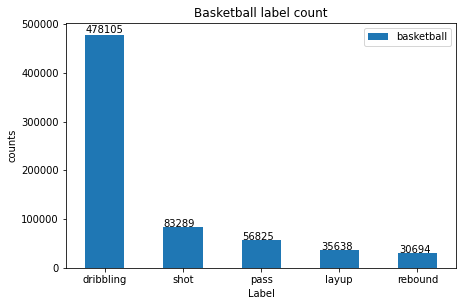

In [14]:
d_f = pd.DataFrame( hist_b, columns = ['basketball'] ,index = x)
print(d_f)
ax = d_f.plot(kind='bar', title = 'Basketball label count', rot=0, width = 0.5, figsize=(7, 4.5))
plt.ylabel('counts')
plt.xlabel('Label')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))
plt.savefig('Basketball label counts.png',bbox_inches='tight', dpi=300)
plt.show()

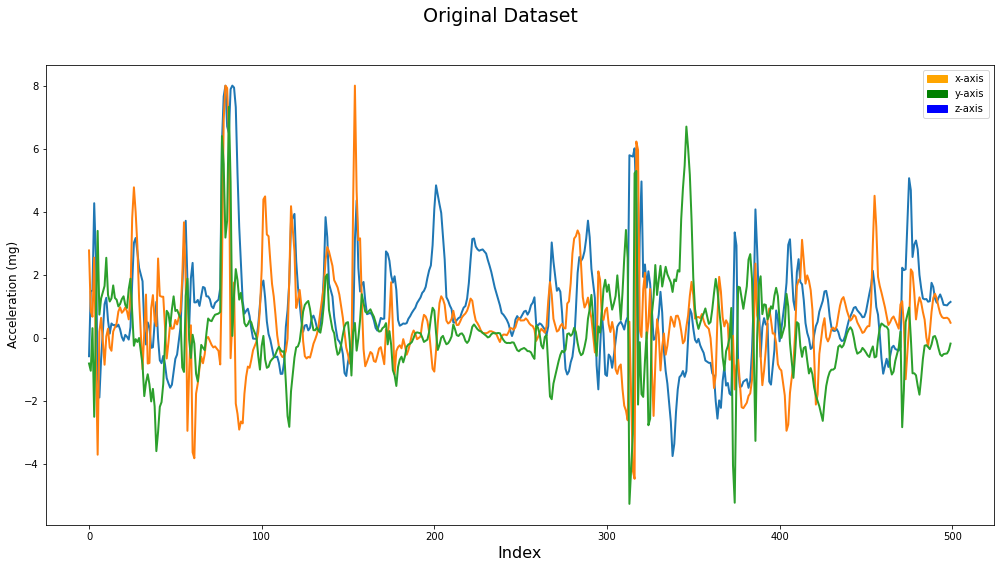

In [15]:
#To plot the original dataset 500 points
from data_processing.plotting import plot_data
data1 = data[data[:, 0] == 0]
plot_data(data1[:,1:4][0:500], 'Original Dataset')

In [16]:
#To implement min-max scaler to our dataset
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#To define a scaler between -1 and 1
scaler = MinMaxScaler(feature_range=[-1,1])
data_activity_wise = {}
data_activity_wise_scaled = []
all_activites = pd.unique(pd.Series(data[:, -1]))

#Defining loop to create list of array data activity wise
for activity in all_activites:
    data_activity_wise[activity] = data[data[:, -1] == activity]

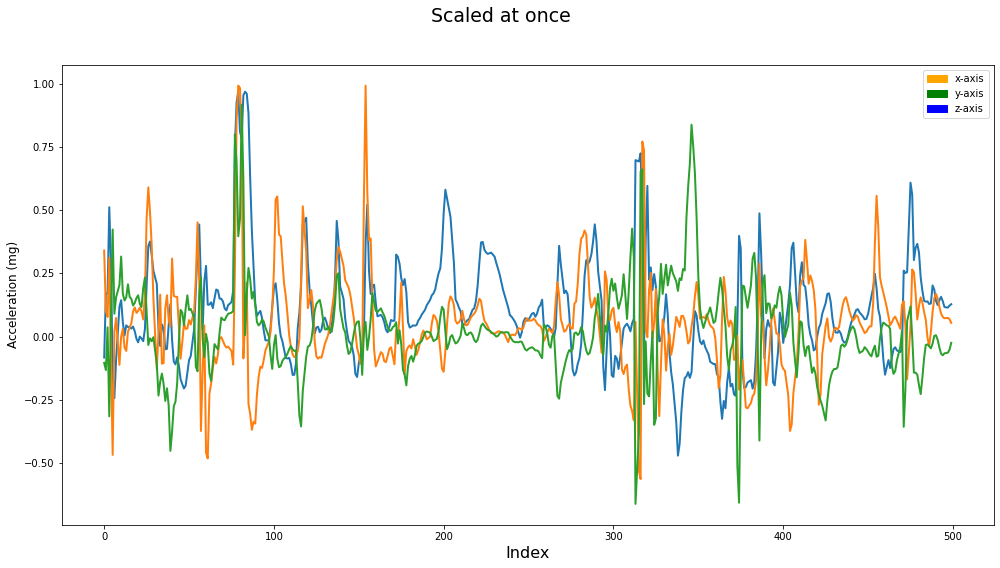

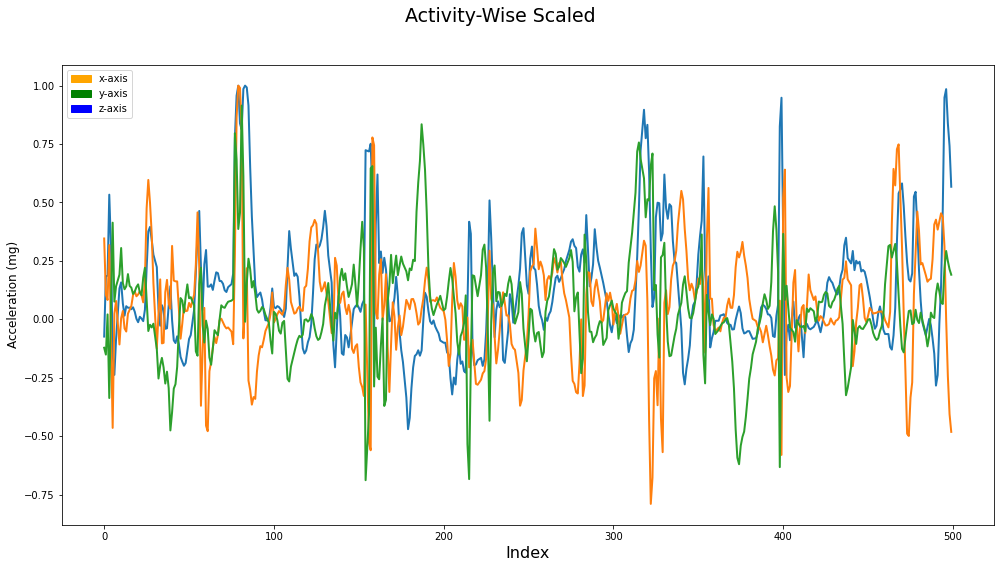

Scaled at once:
Mean(x): 0.053454518499923484; Std(x): 0.19075773743364
Mean(y): 0.022919604839104744; Std(y): 0.1798050149549556
Mean(z): 2.138; Std(z): 0.960705990404973

Scaled activity-wise:
Mean(x): 0.12002656488175345; Std(x): 0.250819407346154
Mean(y): 0.05150754037429096; Std(y): 0.2273695709996456
Mean(z): 0.052675312776868384; Std(z): 0.22203449827592428


In [17]:
#This block is used for visulaization purpose

for activity, activity_data in data_activity_wise.items():
    data_activity_wise_scaled.append(scaler.fit_transform(activity_data[:, 1:4]))
    data_activity_ = np.concatenate(data_activity_wise_scaled)

#To scale data all at once but this data is not used for training
scaled_data = scaler.fit_transform(data[:, 1:4])
data_scaled_at_once = np.concatenate((scaled_data, data[:, -1][:, None]), axis=1)
data_activity_wise = np.concatenate(data_activity_wise_scaled)

data_activity_wise = data_activity_wise[0:500]
data_scaled_at_once = data_scaled_at_once[0:500]

plot_data(data_scaled_at_once[:, 0:3], "Scaled at once")
plot_data(data_activity_wise, 'Activity-Wise Scaled')

print("Scaled at once:")
print("Mean(x): " + str(np.mean(data_scaled_at_once[:, 1])) + "; Std(x): " + str(np.std(data_scaled_at_once[:, 1])))
print("Mean(y): " + str(np.mean(data_scaled_at_once[:, 2])) + "; Std(y): " + str(np.std(data_scaled_at_once[:, 2])))
print("Mean(z): " + str(np.mean(data_scaled_at_once[:, 3])) + "; Std(z): " + str(np.std(data_scaled_at_once[:, 3])))

print("\nScaled activity-wise:")
print("Mean(x): " + str(np.mean(data_activity_wise[:, 0])) + "; Std(x): " + str(np.std(data_activity_wise[:, 0])))
print("Mean(y): " + str(np.mean(data_activity_wise[:, 1])) + "; Std(y): " + str(np.std(data_activity_wise[:, 1])))
print("Mean(z): " + str(np.mean(data_activity_wise[:, 2])) + "; Std(z): " + str(np.std(data_activity_wise[:, 2])))

In [18]:
#This is defined again to create activity wise scaled data to be used in our training

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler(feature_range=[-1,1])
data_activity_wise = {}
data_activity_wise_scaled = []
all_activites = pd.unique(pd.Series(data[:, -1]))

for activity in all_activites:
    data_activity_wise[activity] = data[data[:, -1] == activity]
#print(data_activity_wise)

In [19]:
data_act_wis_sc = []
for activity, activity_data in data_activity_wise.items():
    data_activity_wise_scaled.append(scaler.fit_transform(activity_data[:, 1:4]))
    data_activity_ = np.concatenate((activity_data[:, 0][:, None], scaler.fit_transform(activity_data[:, 1:4]), activity_data[:, -1][:, None]), axis = 1)
    data_act_wis_sc.append(data_activity_)
data_ = np.concatenate(data_act_wis_sc, axis = 0)
print(data_)
#To check the unique label and subject id in our activity wise scaled as well 
print(np.unique(data_[:, 4]))
print(np.unique(data_[:, 0]))

[[ 0.00000000e+00 -7.40223671e-02  3.45783917e-01 -1.21876084e-01
   2.00000000e+00]
 [ 0.00000000e+00  1.83702749e-01  1.04814059e-01 -1.51088344e-01
   2.00000000e+00]
 [ 0.00000000e+00  1.86876535e-01  8.26574810e-02  2.07991352e-02
   2.00000000e+00]
 ...
 [ 1.20000000e+01 -9.21188917e-02 -4.35175913e-02 -9.21907754e-03
   0.00000000e+00]
 [ 1.20000000e+01 -8.93725963e-02 -3.97907852e-02 -1.22412498e-02
   0.00000000e+00]
 [ 1.20000000e+01 -8.21699897e-02 -2.75181170e-02 -1.93234088e-02
   0.00000000e+00]]
[0. 1. 2. 3. 4.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


In [20]:
#This block is defied to reset the weights and bias while training for each subject

import torch
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score
import time
from misc.torchutils import seed_torch
    
def init_weights(m):
    if type(m) == nn.LSTM:
        for name, param in m.named_parameters():
            if 'weight_ih' in name:
                torch.nn.init.orthogonal_(param.data)
            elif 'weight_hh' in name:
                torch.nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                param.data.fill_(0)
    elif type(m) == nn.Conv2d or type(m) == nn.Linear:
        torch.nn.init.orthogonal_(m.weight)
        m.bias.data.fill_(0) 

In [21]:
#Variable use to store our F1 score for ploting purpose

hist = []
hist_1 = []
#to store F1 score for each activity for basketball
hist_2 = {'shot': [], 'layup': [], 'dribbling': [], 'rebound': [], 'pass': []} 

In [22]:
#Defining a training function for cross validation purpose
def train():
    import torch
    from torch.utils.data import DataLoader
    from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score
    import time
    from misc.torchutils import seed_torch

    #variable defined to store loss and F1 for each subject for plotting purpose
    history = {'loss': [], 'F1': []}
   
    config = {
        'nb_filters': 64,
        #'nb_filters2': 64,
        'filter_width': 20,
        'nb_units_lstm': 256,
        #'nb_units_lstm2': 128,
        'nb_layers_lstm': 1,
        'drop_prob': 0.5,
        'seed': 1,
        'epochs': 20,
        'batch_size': 100,
        'learning_rate': 0.0001,
        'weight_decay': 1e-6,
        'gpu_name': 'cuda:0',
        'print_counts': False
    }


    # to seed torch and other random parts for reproducible results
    seed_torch(config['seed'])

    
    config['window_size'] = X_train.shape[1]
    config['nb_channels'] = X_train.shape[2]
    config['nb_classes'] = len(class_names)

    # to initializing DeepConvLSTM network object 
    network = DeepConvLSTM(config)
    #resetting the weights and bias
    network.apply(init_weights) 

    # to sending network to GPU
    network.to(config['gpu_name'])
    network.train()

    # to initialize the optimizer and loss functon
    optimizer = torch.optim.Adam(network.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])
    criterion = nn.CrossEntropyLoss()

    # initializing the train and validation dataset in Torch format
    train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train))
    val_dataset = torch.utils.data.TensorDataset(torch.from_numpy(X_valid).float(), torch.from_numpy(y_valid))

    # to define the data loader
    trainloader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)    
    valloader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=True)

    # defining the training loop to iterate over epoch
    for e in range(config['epochs']):
        # lists defined for storing results
        train_losses = []
        train_preds = []
        train_gt = []
        start_time = time.time()
        batch_num = 1

        # iterating over the trainloader object
        for i, (x, y) in enumerate(trainloader):
            # sending batch x and y to the GPU
            inputs, targets = x.to(config['gpu_name']), y.to(config['gpu_name'])
            optimizer.zero_grad()

            # sending inputs through network to get predictions
            train_output = network(inputs)

            # calculating the loss
            loss = criterion(train_output, targets.long())

            #Backpropogating the loss function for optimisation
            
            loss.backward()
            optimizer.step()

            # calculating actual predictions using softmax probabilites)
            train_output = torch.nn.functional.softmax(train_output, dim=1)

            # storing the computed batch loss to a list
            train_losses.append(loss.item())

            # creating the predictions and true labels
            # appending them to the final lists
            y_preds = np.argmax(train_output.cpu().detach().numpy(), axis=-1)
            y_true = targets.cpu().numpy().flatten()
            train_preds = np.concatenate((np.array(train_preds, int), np.array(y_preds, int)))
            train_gt = np.concatenate((np.array(train_gt, int), np.array(y_true, int)))

            # To print out every 100 batch information
            if batch_num % 100 == 0 and batch_num > 0:
                cur_loss = np.mean(train_losses)
                elapsed = time.time() - start_time
                print('| epoch {:3d} | {:5d} batches | ms/batch {:5.2f} | train loss {:5.2f}'.format(e, batch_num, elapsed * 1000 / config['batch_size'], cur_loss))
                start_time = time.time()
                batch_num += 1
        # list object to store results for validation
        val_preds = []
        val_gt = []
        val_losses = []

        # to set the network in the evaluation mode 
        network.eval()
        with torch.no_grad():
            # iteratating over the validation object loader
            for i, (x, y) in enumerate(valloader):
                # sending the batch x and y to the GPU
                inputs, targets = x.to(config['gpu_name']), y.to(config['gpu_name'])

         
                val_output = network(inputs)


                val_loss = criterion(val_output, targets.long())


                val_output = torch.nn.functional.softmax(val_output, dim=1)

  
                val_losses.append(val_loss.item())

                y_preds = np.argmax(val_output.cpu().numpy(), axis=-1)
                y_true = targets.cpu().numpy().flatten()
                val_preds = np.concatenate((np.array(val_preds, int), np.array(y_preds, int)))
                val_gt = np.concatenate((np.array(val_gt, int), np.array(y_true, int)))

            # to print the evaluation results for train and validation dataset
            print("\nEPOCH: {}/{}".format(e + 1, config['epochs']),
                      "\nTrain Loss: {:.4f}".format(np.mean(train_losses)),
                      "Train Acc: {:.4f}".format(jaccard_score(train_gt, train_preds, average='macro')),
                      "Train Prec: {:.4f}".format(precision_score(train_gt, train_preds, average='macro')),
                      "Train Rcll: {:.4f}".format(recall_score(train_gt, train_preds, average='macro')),
                      "Train F1: {:.4f}".format(f1_score(train_gt, train_preds, average='macro')),
                      "\nVal Loss: {:.4f}".format(np.mean(val_losses)),
                      "Val Acc: {:.4f}".format(jaccard_score(val_gt, val_preds, average='macro')),
                      "Val Prec: {:.4f}".format(precision_score(val_gt, val_preds, average='macro')),
                      "Val Rcll: {:.4f}".format(recall_score(val_gt, val_preds, average='macro')),
                      "Val F1: {:.4f}".format(f1_score(val_gt, val_preds, average='macro')))
            
            #variable to store the overall F1 per epoch 
            F1 = f1_score(val_gt, val_preds, average='macro')
            #to store the loss per epoch
            history['loss'].append(np.mean(val_losses))
            #to store the F1 per epoch
            history['F1'].append(F1)
            #if epoch is 20(count form 0) then we start to print results
            if e == 19:
                
                #we have defined our function to print the F1 per class
                print('\nTraining F1-score:', f1_score_metric(train_gt, train_preds, [0, 1, 2, 3, 4]))
                print('\nValidation F1-score:', f1_score_metric(val_gt, val_preds, [0, 1, 2, 3, 4]))
                
                #To print the confusion matrix after 20 epoch
                print('\Confusion Matrix Training:')
                plot_confusion_matrix(train_gt, train_preds, [0, 1, 2, 3, 4])
                
                print('\Confusion Matrix Validation:')
                plot_confusion_matrix(val_gt, val_preds, [0, 1, 2, 3, 4])
                
                #to store the F1 score after 20 epoch for visualisation purpose
                hist.append(history['F1'])
                hist_1.append(history['F1'][-1])
                
                #Plot function call to plot the loss vs F1 per 20 epoch
                plot_loss_F1_vsEpoc(history)
            
            
            
            # to print the value counts of the predicted labels for train and validation dataset if it is chosen
            if config['print_counts']:
                print('Predicted Train Labels: ')
                print(np.vstack((np.nonzero(np.bincount(train_preds))[0], np.bincount(train_preds)[np.nonzero(np.bincount(train_preds))[0]])).T)
                print('Predicted Val Labels: ')
                print(np.vstack((np.nonzero(np.bincount(val_preds))[0], np.bincount(val_preds)[np.nonzero(np.bincount(val_preds))[0]])).T)


        # setting the network to training mode again
        network.train()

In [23]:
import matplotlib.pyplot as plt

#Function to print F1 and Loss per Epoch after 20 epoch
def plot_loss_F1_vsEpoc(hist):
    #getting the history data that was store during training and validation
    data1 = hist['F1']
    data2 = hist['loss']
    fig, sub = plt.subplots()

    sub.plot(data1, color='blue', marker='o',mfc='blue', label = 'F1' ) #plotting the data
    sub.plot(data2, color='green', label = 'Loss' ) #plotting the data
    plt.xticks(range(0,len(data1), 1)) #setting the tick frequency on x-axis
    plt.ylabel('F1/Loss') #set the label for y axis
    plt.xlabel('epoch') #setting the label for x-axis
    sub.legend(loc = 'lower left')
    plt.title("Plotting a list") #setting the title of the graph
    plt.show() #display the graph

In [24]:
#other function defined to print data at each epoch for each subject from store history data
def plot_loss_F1_vs_Epoc(hist):

    fig, sub = plt.subplots()

    sub.plot(hist[0], color='blue', marker='o',mfc='blue', label = 'F1_0' )
    sub.plot(hist[1], color='red', marker='o',mfc='red', label = 'F1_1' )
    sub.plot(hist[2], color='yellow', marker='o',mfc='yellow', label = 'F1_2' )
    sub.plot(hist[3], color='black', marker='o',mfc='black', label = 'F1_3' )
    sub.plot(hist[4], color='purple', marker='o',mfc='purple', label = 'F1_4' )
    sub.plot(hist[5], color='brown', marker='o',mfc='brown', label = 'F1_5' )
    sub.plot(hist[6], color='green', marker='o',mfc='green', label = 'F1_6' )
    sub.plot(hist[7], color='pink', marker='o',mfc='pink', label = 'F1_7' )
    sub.plot(hist[8], color='orange', marker='o',mfc='brown', label = 'F1_8' )
    sub.plot(hist[9], color='lime', marker='o',mfc='orange', label = 'F1_9' )
    sub.plot(hist[10], color='cyan', marker='o',mfc='cyan', label = 'F_10' )
    sub.plot(hist[11], color='orchid', marker='o',mfc='orchid', label = 'F1_11' )
    #plot the data
    plt.xticks(range(0,len(hist[0]), 1))
    plt.ylabel('F1') 
    plt.xlabel('epoch')
    sub.legend(title='SUBJECT',title_fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Stats of F1 score at each Epoch")
    plt.show()

In [25]:

#Defining our network
from torch import nn

class DeepConvLSTM(nn.Module):
    def __init__(self, config):
        super(DeepConvLSTM, self).__init__()
        # parameters
        self.window_size = config['window_size']
        self.drop_prob = config['drop_prob']
        self.nb_channels = config['nb_channels']
        self.nb_classes = config['nb_classes']
        self.seed = config['seed']
        self.nb_filters = config['nb_filters']
        #self.nb_filters2 = config['nb_filters2']
        self.filter_width = config['filter_width']
        self.nb_units_lstm = config['nb_units_lstm']
        #self.nb_units_lstm2 = config['nb_units_lstm']
        self.nb_layers_lstm = config['nb_layers_lstm']
        
        # defining the activation function
        self.relu = nn.ReLU()
        
        # defining convlution and batch normalisation layers
        self.conv1 = nn.Conv2d(1, self.nb_filters, (self.filter_width, 1))
        self.bn1 = nn.BatchNorm2d(self.nb_filters)
        self.conv2 = nn.Conv2d(self.nb_filters, self.nb_filters, (self.filter_width, 1))
        self.bn2 = nn.BatchNorm2d(self.nb_filters)
        self.conv3 = nn.Conv2d(self.nb_filters, self.nb_filters, (self.filter_width, 1))
        self.bn3 = nn.BatchNorm2d(self.nb_filters)
        self.conv4 = nn.Conv2d(self.nb_filters, self.nb_filters, (self.filter_width, 1))
        
        # defining lstm layers
        self.lstm = nn.LSTM(input_size = self.nb_filters * self.nb_channels, hidden_size = self.nb_units_lstm, num_layers = self.nb_layers_lstm)
        #self.lstm2 = nn.LSTM(input_size = self.nb_filters2 * self.nb_channels, hidden_size = self.nb_units_lstm2, num_layers = self.nb_layers_lstm)
        
        # defining dropout layer
        self.dropout = nn.Dropout(self.drop_prob)
        
        # defining the classifier
        self.fc = nn.Linear(self.nb_units_lstm, self.nb_classes)

    def forward(self, x):
        
        # reshaping the data for convolutions
        x = x.view(-1, 1, self.window_size, self.nb_channels)
        
        
        # applying the convolution and the activation function
        x = self.relu(self.conv1(x))
        #batch normalization layer between convolution layer
        x = self.bn1(x)
        x = self.relu(self.conv2(x))
        x = self.bn2(x)
        x = self.relu(self.conv3(x))
        x = self.bn3(x)
        x = self.relu(self.conv4(x))


        # setting the final sequence length 
        final_seq_len = x.shape[2]
        
        # to permute dimensions and reshape for LSTM
        x = x.permute(0, 2, 1, 3)

        x = x.reshape(-1, final_seq_len, self.nb_filters * self.nb_channels)

        # to apply LSTM (note: it has two outputs!)
        x, _ = self.lstm(x)       
        
        #if 2 LASTM layer to be used
        #x, _ = self.lstm2(x)
        
        # to reshape data for classifier
        x = x.view(-1, self.nb_units_lstm)
        
        # to apply dropout and feed data through classifier
        x = self.dropout(x)
        x = self.fc(x)
        
        # to reshape data and return predicted label of last sample within final sequence (determines label of window)
        out = x.view(-1, final_seq_len, self.nb_classes)
        return out[:, -1, :]

In [26]:
#Function defied to compute the F1 score per class and average F1 score
def compute_tp_tn_fn_fp_(y_act, y_pred, label):
    y_act = pd.Series(y_act)
    y_pred = pd.Series(y_pred)
    tp = sum((y_act == label) & (y_pred == label))
    tn = sum((y_act != label) & (y_pred != label))
    fn = sum((y_act == label) & (y_pred != label))
    fp = sum((y_act != label) & (y_pred == label))
    return tp, tn, fp, fn

def f1_score_metric(actual, predicted, labels):
    # counter variable to accumulate f1-score across labels
    total_f1 = 0
    # to iterate of the labels
    for label in labels:
        # to calculate the number of tp, fp, tn, fn for said label using the actual and predicted arrays
        tp, tn, fp, fn = compute_tp_tn_fn_fp_(actual, predicted, label)
        print('F1-score Label {0}:'.format(label))
        # to calculate the recall and precision value
        if tp != 0 :
            rec = tp/(tp + fn)
            prec = tp/(tp + fp)
            counter = rec * prec
            denominator = prec + rec
            f1 = 2 * counter/denominator
        else:
            f1 = 0
            
        print('label:', label, ':',f1)
        if label == 0:
            hist_2['shot'].append(f1)
        if label == 1:
            hist_2['layup'].append(f1)
        if label == 2:
            hist_2['dribbling'].append(f1)
        if label == 3:
            hist_2['rebound'].append(f1)
        if label == 4:
            hist_2['pass'].append(f1)
        # to adds up the f1-score to the total count
        total_f1 += f1
    print('Average F1-score:')
    #  to print the average f1-score as the unweigthed average across all classes
    print(total_f1 / len(labels))

In [27]:
#to plot the confusion matrix from the actual and predicted labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time 


def plot_confusion_matrix(actual, predicted, labels):
    cm = confusion_matrix(actual, predicted, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot() 


#################
Subject:  0

Shape of the train and validation datasets after splitting and windowing: 
(15777, 80, 4) (15777,)
(1318, 80, 4) (1318,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15777, 80, 4) (1318, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9540 Train Acc: 0.1706 Train Prec: 0.2746 Train Rcll: 0.2295 Train F1: 0.2163 
Val Loss: 0.7310 Val Acc: 0.2691 Val Prec: 0.3033 Val Rcll: 0.3391 Val F1: 0.3194

EPOCH: 2/20 
Train Loss: 0.7260 Train Acc: 0.2787 Train Prec: 0.5164 Train Rcll: 0.3525 Train F1: 0.3619 
Val Loss: 0.5839 Val Acc: 0.3477 Val Prec: 0.7140 Val Rcll: 0.4342 Val F1: 0.4364

EPOCH: 3/20 
Train Loss: 0.6432 Train Acc: 0.3332 Train Prec: 0.5263 Train Rcll: 0.4222 Train F1: 0.4321 
Val Loss: 0.5893 Val Acc: 0.3714 Val Prec: 0.7272 Val Rcll: 0.4693 Val F1: 0.4681

EPOCH: 4/20 
Train Loss: 0.5905 Train Acc: 0.3754 Train Prec: 0.5936 Train Rcll: 0.4703 Train F1: 0.4873 
Val Loss: 0.5584 Val Acc: 0.3623 Val Prec: 0.4528 Val Rcll: 0.

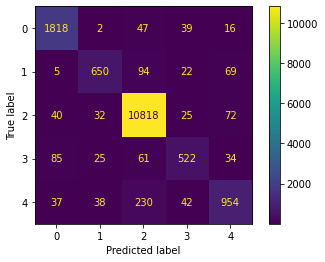

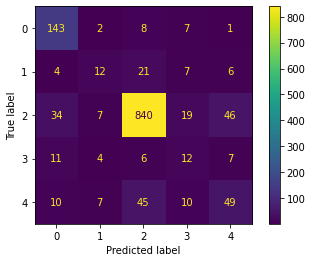

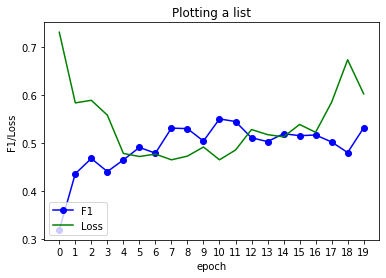

Subject:  1

Shape of the train and validation datasets after splitting and windowing: 
(15921, 80, 4) (15921,)
(1174, 80, 4) (1174,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15921, 80, 4) (1174, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9460 Train Acc: 0.1739 Train Prec: 0.3515 Train Rcll: 0.2333 Train F1: 0.2221 
Val Loss: 0.7021 Val Acc: 0.2550 Val Prec: 0.2904 Val Rcll: 0.3249 Val F1: 0.3064

EPOCH: 2/20 
Train Loss: 0.7313 Train Acc: 0.2780 Train Prec: 0.5328 Train Rcll: 0.3522 Train F1: 0.3610 
Val Loss: 0.6243 Val Acc: 0.3114 Val Prec: 0.4594 Val Rcll: 0.3871 Val F1: 0.3917

EPOCH: 3/20 
Train Loss: 0.6465 Train Acc: 0.3362 Train Prec: 0.5375 Train Rcll: 0.4238 Train F1: 0.4359 
Val Loss: 0.5757 Val Acc: 0.3118 Val Prec: 0.3841 Val Rcll: 0.3936 Val F1: 0.3820

EPOCH: 4/20 
Train Loss: 0.5969 Train Acc: 0.3720 Train Prec: 0.5859 Train Rcll: 0.4654 Train F1: 0.4820 
Val Loss: 0.5862 Val Acc: 0.3183 Val Prec: 0.4492 Val Rcll: 0.4066 Val F1: 0.399

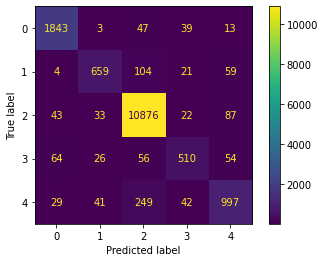

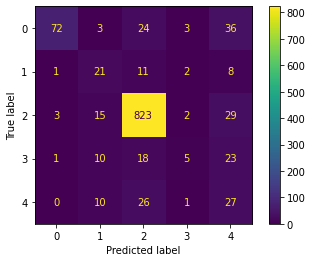

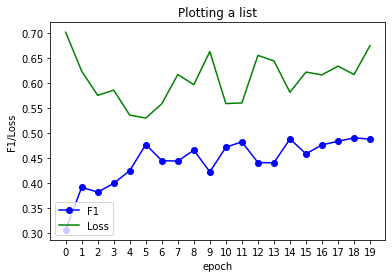

Subject:  2

Shape of the train and validation datasets after splitting and windowing: 
(15765, 80, 4) (15765,)
(1330, 80, 4) (1330,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15765, 80, 4) (1330, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9489 Train Acc: 0.1710 Train Prec: 0.3316 Train Rcll: 0.2292 Train F1: 0.2168 
Val Loss: 0.8182 Val Acc: 0.2493 Val Prec: 0.2814 Val Rcll: 0.3327 Val F1: 0.3039

EPOCH: 2/20 
Train Loss: 0.7365 Train Acc: 0.2678 Train Prec: 0.5138 Train Rcll: 0.3383 Train F1: 0.3458 
Val Loss: 0.6918 Val Acc: 0.3181 Val Prec: 0.4835 Val Rcll: 0.4279 Val F1: 0.4062

EPOCH: 3/20 
Train Loss: 0.6489 Train Acc: 0.3262 Train Prec: 0.5250 Train Rcll: 0.4105 Train F1: 0.4237 
Val Loss: 0.6200 Val Acc: 0.3745 Val Prec: 0.6423 Val Rcll: 0.4796 Val F1: 0.4786

EPOCH: 4/20 
Train Loss: 0.6029 Train Acc: 0.3534 Train Prec: 0.5492 Train Rcll: 0.4438 Train F1: 0.4572 
Val Loss: 0.5943 Val Acc: 0.3748 Val Prec: 0.6257 Val Rcll: 0.4715 Val F1: 0.479

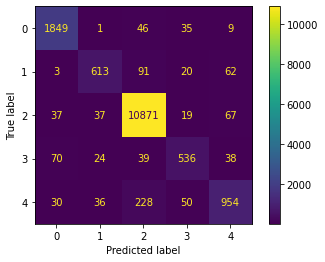

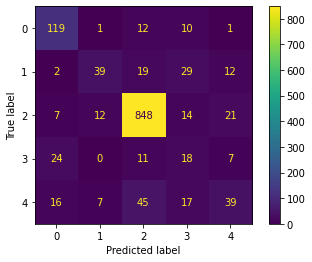

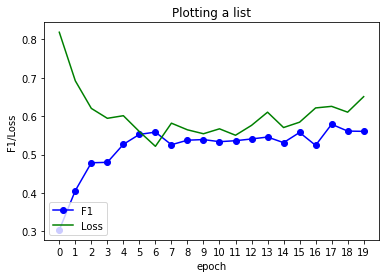

Subject:  3

Shape of the train and validation datasets after splitting and windowing: 
(15842, 80, 4) (15842,)
(1253, 80, 4) (1253,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15842, 80, 4) (1253, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9388 Train Acc: 0.1756 Train Prec: 0.3491 Train Rcll: 0.2343 Train F1: 0.2238 
Val Loss: 0.8428 Val Acc: 0.1912 Val Prec: 0.3399 Val Rcll: 0.2521 Val F1: 0.2461

EPOCH: 2/20 
Train Loss: 0.7181 Train Acc: 0.2797 Train Prec: 0.4899 Train Rcll: 0.3527 Train F1: 0.3590 
Val Loss: 0.7268 Val Acc: 0.2808 Val Prec: 0.4822 Val Rcll: 0.3477 Val F1: 0.3765

EPOCH: 3/20 
Train Loss: 0.6349 Train Acc: 0.3372 Train Prec: 0.5346 Train Rcll: 0.4246 Train F1: 0.4367 
Val Loss: 0.7377 Val Acc: 0.2633 Val Prec: 0.4402 Val Rcll: 0.3360 Val F1: 0.3579

EPOCH: 4/20 
Train Loss: 0.5848 Train Acc: 0.3715 Train Prec: 0.5793 Train Rcll: 0.4642 Train F1: 0.4793 
Val Loss: 0.6839 Val Acc: 0.3084 Val Prec: 0.4873 Val Rcll: 0.4134 Val F1: 0.414

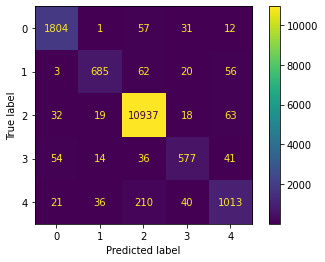

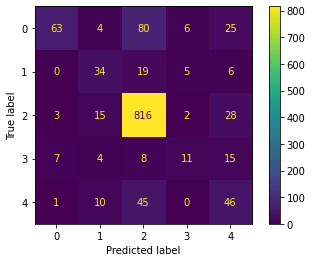

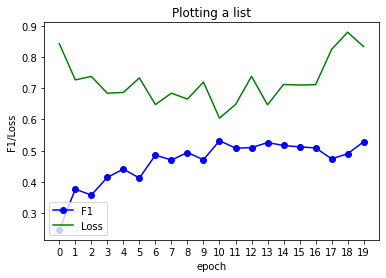

Subject:  4

Shape of the train and validation datasets after splitting and windowing: 
(15609, 80, 4) (15609,)
(1486, 80, 4) (1486,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15609, 80, 4) (1486, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9361 Train Acc: 0.1722 Train Prec: 0.3000 Train Rcll: 0.2303 Train F1: 0.2184 
Val Loss: 0.8275 Val Acc: 0.2316 Val Prec: 0.3743 Val Rcll: 0.3090 Val F1: 0.2895

EPOCH: 2/20 
Train Loss: 0.7246 Train Acc: 0.2811 Train Prec: 0.4701 Train Rcll: 0.3523 Train F1: 0.3643 
Val Loss: 0.7375 Val Acc: 0.3019 Val Prec: 0.4129 Val Rcll: 0.4164 Val F1: 0.3948

EPOCH: 3/20 
Train Loss: 0.6476 Train Acc: 0.3358 Train Prec: 0.5538 Train Rcll: 0.4228 Train F1: 0.4357 
Val Loss: 0.6980 Val Acc: 0.3131 Val Prec: 0.4137 Val Rcll: 0.4271 Val F1: 0.4028

EPOCH: 4/20 
Train Loss: 0.5999 Train Acc: 0.3620 Train Prec: 0.5720 Train Rcll: 0.4525 Train F1: 0.4671 
Val Loss: 0.6507 Val Acc: 0.3257 Val Prec: 0.5202 Val Rcll: 0.4520 Val F1: 0.418

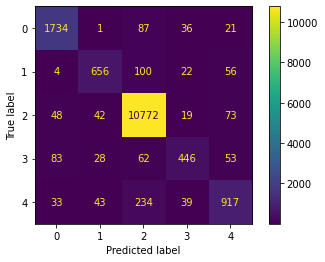

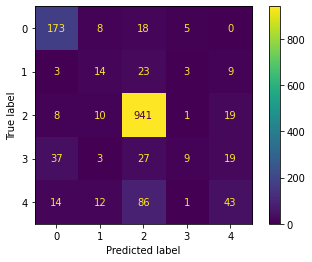

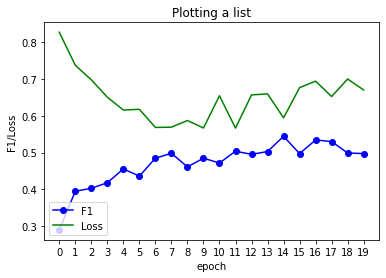

Subject:  5

Shape of the train and validation datasets after splitting and windowing: 
(15954, 80, 4) (15954,)
(1141, 80, 4) (1141,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15954, 80, 4) (1141, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9495 Train Acc: 0.1786 Train Prec: 0.3751 Train Rcll: 0.2386 Train F1: 0.2288 
Val Loss: 0.7526 Val Acc: 0.2280 Val Prec: 0.2811 Val Rcll: 0.3237 Val F1: 0.2897

EPOCH: 2/20 
Train Loss: 0.7188 Train Acc: 0.2860 Train Prec: 0.5469 Train Rcll: 0.3609 Train F1: 0.3701 
Val Loss: 0.6636 Val Acc: 0.3327 Val Prec: 0.5808 Val Rcll: 0.4867 Val F1: 0.4447

EPOCH: 3/20 
Train Loss: 0.6311 Train Acc: 0.3449 Train Prec: 0.5434 Train Rcll: 0.4341 Train F1: 0.4484 
Val Loss: 0.6948 Val Acc: 0.3239 Val Prec: 0.5059 Val Rcll: 0.5052 Val F1: 0.4374

EPOCH: 4/20 
Train Loss: 0.5809 Train Acc: 0.3767 Train Prec: 0.5704 Train Rcll: 0.4723 Train F1: 0.4877 
Val Loss: 0.6632 Val Acc: 0.3443 Val Prec: 0.4702 Val Rcll: 0.5354 Val F1: 0.462

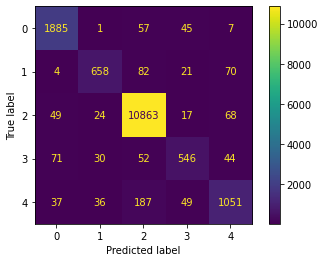

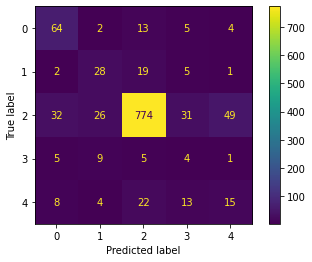

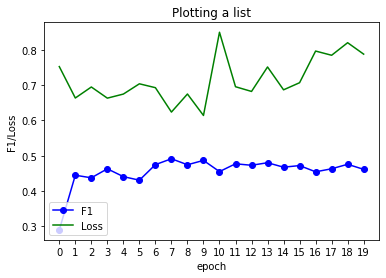

Subject:  6

Shape of the train and validation datasets after splitting and windowing: 
(15788, 80, 4) (15788,)
(1307, 80, 4) (1307,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15788, 80, 4) (1307, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9400 Train Acc: 0.1787 Train Prec: 0.3513 Train Rcll: 0.2370 Train F1: 0.2281 
Val Loss: 0.8159 Val Acc: 0.2245 Val Prec: 0.3033 Val Rcll: 0.2882 Val F1: 0.2816

EPOCH: 2/20 
Train Loss: 0.7289 Train Acc: 0.2722 Train Prec: 0.4760 Train Rcll: 0.3431 Train F1: 0.3506 
Val Loss: 0.7064 Val Acc: 0.2806 Val Prec: 0.4832 Val Rcll: 0.3454 Val F1: 0.3580

EPOCH: 3/20 
Train Loss: 0.6416 Train Acc: 0.3309 Train Prec: 0.5533 Train Rcll: 0.4156 Train F1: 0.4314 
Val Loss: 0.7114 Val Acc: 0.3156 Val Prec: 0.4854 Val Rcll: 0.3868 Val F1: 0.3962

EPOCH: 4/20 
Train Loss: 0.5898 Train Acc: 0.3647 Train Prec: 0.5700 Train Rcll: 0.4559 Train F1: 0.4721 
Val Loss: 0.6184 Val Acc: 0.3282 Val Prec: 0.4823 Val Rcll: 0.3985 Val F1: 0.411

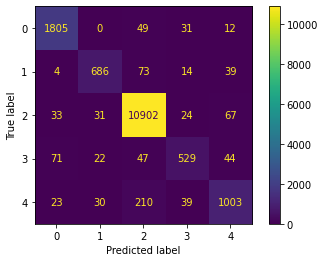

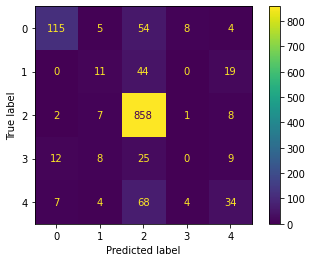

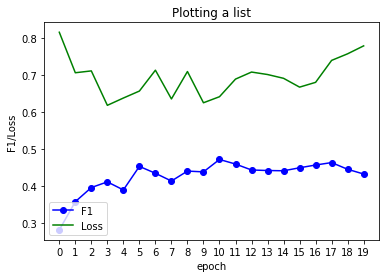

Subject:  7

Shape of the train and validation datasets after splitting and windowing: 
(15676, 80, 4) (15676,)
(1419, 80, 4) (1419,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15676, 80, 4) (1419, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9415 Train Acc: 0.1693 Train Prec: 0.3199 Train Rcll: 0.2271 Train F1: 0.2138 
Val Loss: 0.9104 Val Acc: 0.2508 Val Prec: 0.2870 Val Rcll: 0.3343 Val F1: 0.3063

EPOCH: 2/20 
Train Loss: 0.7322 Train Acc: 0.2664 Train Prec: 0.4822 Train Rcll: 0.3370 Train F1: 0.3418 
Val Loss: 0.7074 Val Acc: 0.3313 Val Prec: 0.5225 Val Rcll: 0.4236 Val F1: 0.4257

EPOCH: 3/20 
Train Loss: 0.6410 Train Acc: 0.3259 Train Prec: 0.5311 Train Rcll: 0.4083 Train F1: 0.4239 
Val Loss: 0.6478 Val Acc: 0.3685 Val Prec: 0.6268 Val Rcll: 0.4556 Val F1: 0.4705

EPOCH: 4/20 
Train Loss: 0.5910 Train Acc: 0.3554 Train Prec: 0.5590 Train Rcll: 0.4446 Train F1: 0.4607 
Val Loss: 0.6378 Val Acc: 0.3822 Val Prec: 0.6289 Val Rcll: 0.4820 Val F1: 0.493

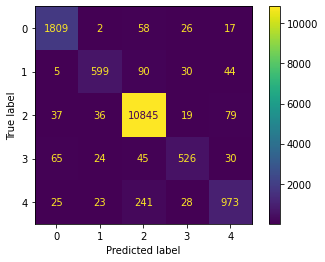

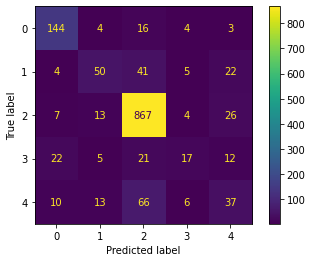

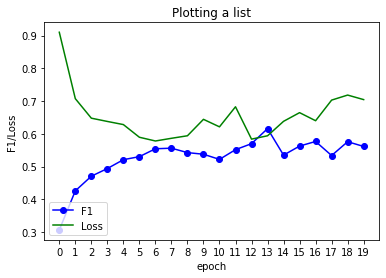

Subject:  8

Shape of the train and validation datasets after splitting and windowing: 
(15636, 80, 4) (15636,)
(1459, 80, 4) (1459,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15636, 80, 4) (1459, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9347 Train Acc: 0.1736 Train Prec: 0.3018 Train Rcll: 0.2317 Train F1: 0.2202 
Val Loss: 0.9905 Val Acc: 0.1739 Val Prec: 0.2315 Val Rcll: 0.2432 Val F1: 0.2259

EPOCH: 2/20 
Train Loss: 0.7018 Train Acc: 0.2878 Train Prec: 0.5685 Train Rcll: 0.3600 Train F1: 0.3705 
Val Loss: 0.9021 Val Acc: 0.2336 Val Prec: 0.4476 Val Rcll: 0.3109 Val F1: 0.3196

EPOCH: 3/20 
Train Loss: 0.6145 Train Acc: 0.3474 Train Prec: 0.5470 Train Rcll: 0.4335 Train F1: 0.4470 
Val Loss: 0.8468 Val Acc: 0.2768 Val Prec: 0.5074 Val Rcll: 0.3854 Val F1: 0.3723

EPOCH: 4/20 
Train Loss: 0.5629 Train Acc: 0.3824 Train Prec: 0.5848 Train Rcll: 0.4765 Train F1: 0.4902 
Val Loss: 0.8346 Val Acc: 0.2878 Val Prec: 0.5609 Val Rcll: 0.3866 Val F1: 0.393

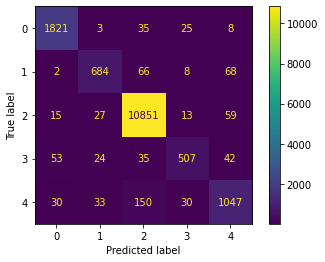

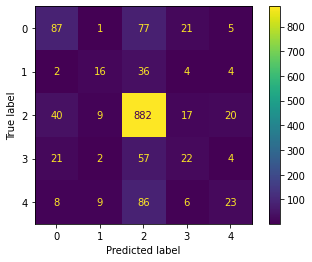

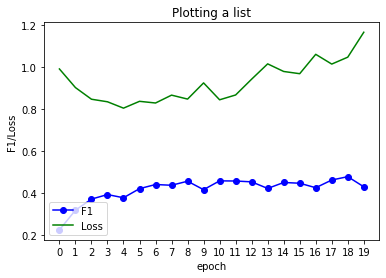

Subject:  9

Shape of the train and validation datasets after splitting and windowing: 
(15907, 80, 4) (15907,)
(1188, 80, 4) (1188,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15907, 80, 4) (1188, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9521 Train Acc: 0.1728 Train Prec: 0.3754 Train Rcll: 0.2322 Train F1: 0.2201 
Val Loss: 0.6182 Val Acc: 0.2990 Val Prec: 0.3449 Val Rcll: 0.3455 Val F1: 0.3416

EPOCH: 2/20 
Train Loss: 0.7362 Train Acc: 0.2760 Train Prec: 0.5330 Train Rcll: 0.3502 Train F1: 0.3605 
Val Loss: 0.5185 Val Acc: 0.3781 Val Prec: 0.5298 Val Rcll: 0.4421 Val F1: 0.4546

EPOCH: 3/20 
Train Loss: 0.6492 Train Acc: 0.3308 Train Prec: 0.5218 Train Rcll: 0.4176 Train F1: 0.4309 
Val Loss: 0.4634 Val Acc: 0.4096 Val Prec: 0.5043 Val Rcll: 0.5042 Val F1: 0.4830

EPOCH: 4/20 
Train Loss: 0.6038 Train Acc: 0.3652 Train Prec: 0.5599 Train Rcll: 0.4616 Train F1: 0.4726 
Val Loss: 0.4527 Val Acc: 0.4285 Val Prec: 0.5801 Val Rcll: 0.5104 Val F1: 0.518

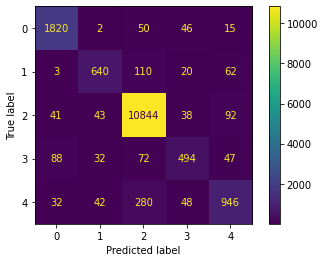

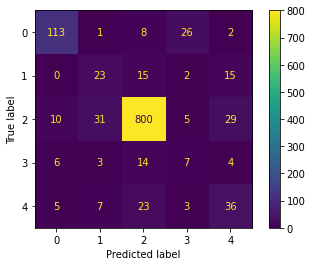

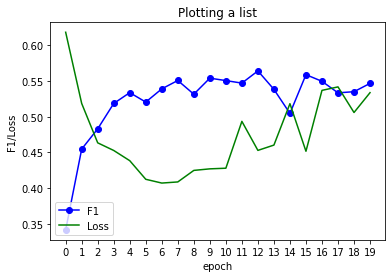

Subject:  10

Shape of the train and validation datasets after splitting and windowing: 
(15741, 80, 4) (15741,)
(1354, 80, 4) (1354,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15741, 80, 4) (1354, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9444 Train Acc: 0.1745 Train Prec: 0.3058 Train Rcll: 0.2337 Train F1: 0.2223 
Val Loss: 0.7808 Val Acc: 0.2093 Val Prec: 0.3114 Val Rcll: 0.2630 Val F1: 0.2626

EPOCH: 2/20 
Train Loss: 0.7278 Train Acc: 0.2775 Train Prec: 0.5249 Train Rcll: 0.3505 Train F1: 0.3596 
Val Loss: 0.7250 Val Acc: 0.2581 Val Prec: 0.5583 Val Rcll: 0.3119 Val F1: 0.3444

EPOCH: 3/20 
Train Loss: 0.6398 Train Acc: 0.3400 Train Prec: 0.5407 Train Rcll: 0.4247 Train F1: 0.4414 
Val Loss: 0.6730 Val Acc: 0.2901 Val Prec: 0.5535 Val Rcll: 0.3600 Val F1: 0.3833

EPOCH: 4/20 
Train Loss: 0.5847 Train Acc: 0.3748 Train Prec: 0.5804 Train Rcll: 0.4683 Train F1: 0.4853 
Val Loss: 0.6167 Val Acc: 0.3165 Val Prec: 0.5242 Val Rcll: 0.3856 Val F1: 0.40

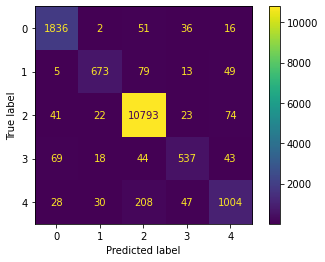

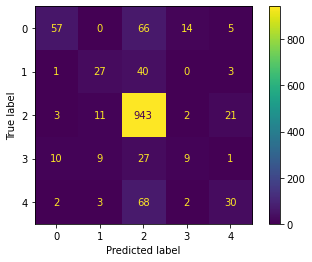

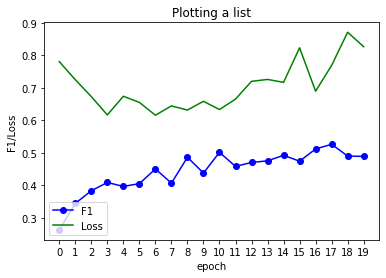

Subject:  11

Shape of the train and validation datasets after splitting and windowing: 
(15737, 80, 4) (15737,)
(1358, 80, 4) (1358,)

Shape of the train and validation feature dataset after splitting and windowing: 
(15737, 80, 4) (1358, 80, 4)

EPOCH: 1/20 
Train Loss: 0.9400 Train Acc: 0.1747 Train Prec: 0.3351 Train Rcll: 0.2327 Train F1: 0.2218 
Val Loss: 0.9073 Val Acc: 0.2205 Val Prec: 0.2679 Val Rcll: 0.2979 Val F1: 0.2782

EPOCH: 2/20 
Train Loss: 0.7247 Train Acc: 0.2757 Train Prec: 0.5276 Train Rcll: 0.3467 Train F1: 0.3564 
Val Loss: 0.7638 Val Acc: 0.2804 Val Prec: 0.5471 Val Rcll: 0.3744 Val F1: 0.3676

EPOCH: 3/20 
Train Loss: 0.6441 Train Acc: 0.3310 Train Prec: 0.5221 Train Rcll: 0.4149 Train F1: 0.4298 
Val Loss: 0.7188 Val Acc: 0.3134 Val Prec: 0.5995 Val Rcll: 0.4172 Val F1: 0.4154

EPOCH: 4/20 
Train Loss: 0.5892 Train Acc: 0.3679 Train Prec: 0.5804 Train Rcll: 0.4613 Train F1: 0.4749 
Val Loss: 0.6637 Val Acc: 0.3476 Val Prec: 0.6250 Val Rcll: 0.4550 Val F1: 0.45

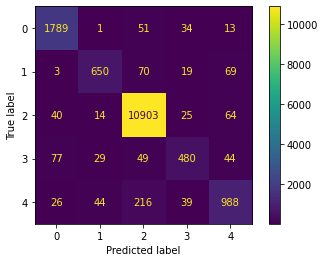

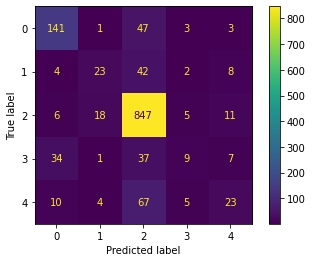

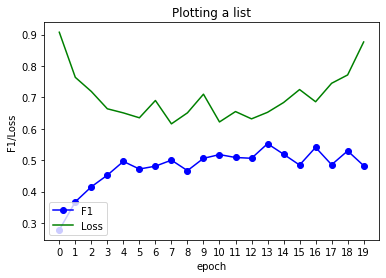

In [28]:
#imports related to data Sliding window was taken from
#https://github.com/mariusbock/dl-for-har

import pandas as pd
import numpy as np
import warnings

from data_processing.sliding_window import apply_sliding_window
from data_processing.preprocess_data import load_dataset

warnings.filterwarnings('ignore')


print('#################')

# setting the value for the sliding window and overlap percentage
sw_length = 80
sw_unit = 'units'
sw_overlap = 50

#Applying the LOSO cross validation technique
for id in range(12):
    
    print('Subject: ', id)
    
    #Train set is defied as the data for 11 subjects
    train_data1 = data_[data_[:, 0] != id]
    
    #Validation set is defied as the data of the current subject
    valid_data1 = data_[data_[:, 0] == id]
    
    # applying a sliding window on top of both the train and validation data using predefied method
    # importing from preprocessing.sliding_window import apply_sliding_window
    X_train, y_train = apply_sliding_window(train_data1[:, :-1], train_data1[:, -1], sliding_window_size=sw_length, unit=sw_unit, sampling_rate=50, sliding_window_overlap=sw_overlap)
    X_valid, y_valid = apply_sliding_window(valid_data1[:, :-1], valid_data1[:, -1], sliding_window_size=sw_length, unit=sw_unit, sampling_rate=50, sliding_window_overlap=sw_overlap)

    print("\nShape of the train and validation datasets after splitting and windowing: ")
    print(X_train.shape, y_train.shape)
    print(X_valid.shape, y_valid.shape)

    print("\nShape of the train and validation feature dataset after splitting and windowing: ")
    print(X_train.shape, X_valid.shape)

    # to convert the features of the train and validation to float32 and labels to uint8 for GPU compatibility 
    X_train, y_train = X_train.astype(np.float32), y_train.astype(np.uint8)
    X_valid, y_valid = X_valid.astype(np.float32), y_valid.astype(np.uint8)
    
    #Calling the train function for ever current subject for cross validation
    train()

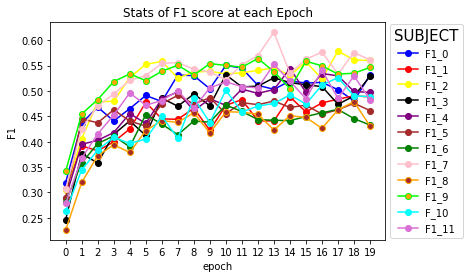

In [29]:
#Calling the F1 of every subject at each epoch
plot_loss_F1_vs_Epoc(hist)

      Total_F1
s_0   0.531920
s_1   0.488201
s_2   0.560323
s_3   0.528634
s_4   0.497179
s_5   0.461354
s_6   0.432714
s_7   0.561358
s_8   0.430817
s_9   0.546623
s_10  0.488993
s_11  0.482734


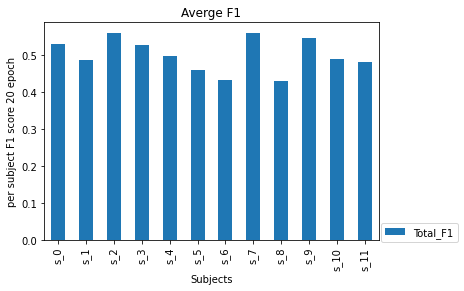

In [33]:
#To plot the data fro average F1 per subject from the history data store during cross validation
_df = pd.DataFrame( hist_1,columns = ['Total_F1'] ,index=['s_0','s_1','s_2','s_3','s_4','s_5','s_6','s_7','s_8','s_9','s_10','s_11'])
print(_df)
_df.plot(kind='bar', title = 'Averge F1')
plt.legend(bbox_to_anchor=(1.25, 0.1))
plt.ylabel('per subject F1 score 20 epoch')
plt.xlabel('Subjects')
plt.show()

          shot     layup  dribbling   rebound      pass
s_0   0.787879  0.292683   0.900322  0.252632  0.426087
s_1   0.669767  0.411765   0.927847  0.142857  0.288770
s_2   0.765273  0.487500   0.923244  0.243243  0.382353
s_3   0.500000  0.519084   0.890830  0.318841  0.414414
s_4   0.788155  0.282828   0.907425  0.157895  0.349593
s_5   0.643216  0.451613   0.887106  0.097561  0.227273
s_6   0.714286  0.201835   0.891429  0.000000  0.356021
s_7   0.804469  0.483092   0.899378  0.300885  0.318966
s_8   0.498567  0.323232   0.837607  0.250000  0.244681
s_9   0.795775  0.383333   0.922190  0.181818  0.450000
s_10  0.530233  0.446281   0.887947  0.216867  0.363636
s_11  0.723077  0.365079   0.879087  0.160714  0.285714


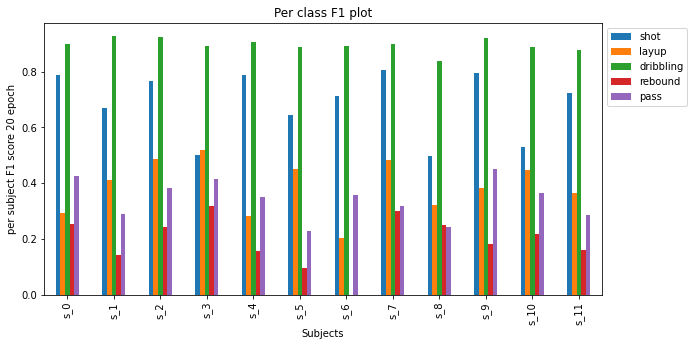

In [31]:
#To plot the data F1 per class per subject from the history data stored during cross validation
hist_2_c = {'shot': [], 'layup': [], 'dribbling': [], 'rebound': [], 'pass': []}

#the validation data is the odd position data on the history list for per class stored data 
for key in hist_2_c:
    hist_2_c[key] = hist_2[key][1::2]

#dataframe defined to plot and print the per label F1 score for basketball
df_ = pd.DataFrame( hist_2_c,columns = ['shot', 'layup', 'dribbling', 'rebound', 'pass'] ,index=['s_0','s_1','s_2','s_3','s_4','s_5','s_6','s_7','s_8','s_9','s_10','s_11'])
print(df_)
df_.plot(kind='bar', width = 0.5, figsize=(10, 5),title= 'Per class F1 plot')
plt.ylabel('per subject F1 score 20 epoch')
plt.xlabel('Subjects')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

      single_LSTM  double_LSTM
s_0          0.48         0.49
s_1          0.46         0.39
s_2          0.53         0.50
s_3          0.48         0.50
s_4          0.42         0.42
s_5          0.44         0.45
s_6          0.46         0.41
s_7          0.53         0.52
s_8          0.42         0.46
s_9          0.48         0.48
s_10         0.46         0.48
s_11         0.43         0.44


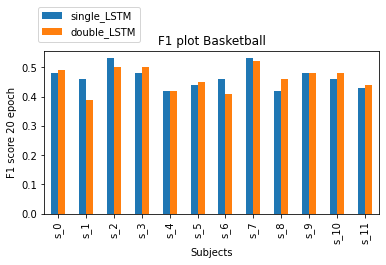

In [32]:
#This code block was created after results from single LSTM and Double LSTM layer
#in the above code i just defined the double LSTM layer and its parameters and then commented
#to run double LSTM layer it needs to be un commented

#For the average F1 score
single_BB = [0.48,0.46,0.53,0.48,0.42,0.44,0.46,0.53,0.42,0.48,0.46,0.43,]
#single_BB = [0.4866018,0.4689936,0.5332866,0.4813190,0.4271674,0.4420634,0.4605840,0.5343880,0.4272624,0.4822096,0.4637775,0.4323941,]
double_BB = [0.49,0.39,0.50,0.50,0.42,0.45,0.41,0.52,0.46,0.48,0.48,0.44,]
d = {'single_LSTM': single_BB, 'double_LSTM': double_BB}
df_ = pd.DataFrame( d ,columns = ['single_LSTM', 'double_LSTM'] , index=['s_0','s_1','s_2','s_3','s_4','s_5','s_6','s_7','s_8','s_9','s_10','s_11'])

print(df_)
ax = df_.plot(kind='bar', width = 0.5, figsize=(6, 3),title= 'F1 plot Basketball') 
plt.ylabel('F1 score 20 epoch')
plt.xlabel('Subjects')
plt.legend(bbox_to_anchor=(0.3, 1.3))
plt.savefig('sing_doub_basketball.png',bbox_inches='tight', dpi=300)
# for p in ax.patches:
#      ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.006))